# Load libraries

In [ ]:
pip install -r https://github.com/corinef/Automated-root-classification/blob/main/requirements.txt

In [63]:
import os
import re
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline
# plt.style.use('classic')
sns.set(font_scale=1.6) #for label size

from scipy.signal import savgol_filter, find_peaks

# Load data

In [12]:
data_path = Path('Insert path to folder containing downloaded data_files here')

data_path = Path('C:/Users/cfa024/OneDrive - UiT Office 365/PhD/Results/Hyperspectral imaging/Python scripts/General scripts for processing HSI data')

data_files = 'Data_files'
data_files_path = data_path / data_files

In [32]:
KMeans_data_folder = 'Data_classification_results/KMeans data'
KMeans_data_path = data_path / KMeans_data_folder

### Set results path

In [33]:
# Change the current working directory to the results_path
results_folder = 'Data_classification_results/Data pre-treatment'
results_path = data_path / results_folder
results_path.mkdir(parents=True, exist_ok = True)
os.chdir(results_path)

### Set ID dictionaries

In [26]:
species_dict = {
    'A2' : '1', 'D2' : '2'
}

# class_dict = {
#     'Selection 0' : 'Soil', '1' : 'Soil',
#     'Selection 1' : 'Mixed', '2' : 'Mixed',
#     'Selection 2' : 'Root', '3' : 'Root'
# }

class_dict = {
    '#000000' : 'Soil', 
    '#ff0000' : 'Mixed', 
    '#55ff00' : 'Roots'
    
}


treatment_dict = {
    'f11' : '1'}

In [36]:
def process_SAM_data(df, name):
    
    global SAM_data
    
    df['Species'] = " ".join(re.findall('^([A-Z0-9]+)', name))
    df['Replicate'] = " ".join(re.findall('_([^_]+)_', name))
    df['Day'] = " ".join(re.findall('_d([^_]+)_', name))
    df['Treatment'] = " ".join(re.findall('[^.*]+_(.*?)$', name))
    
    df['Species_Groups'] = df['Species'].map(species_dict)
    df['Treatment_Groups'] = df['Treatment'].map(treatment_dict)
    df['Treatment_Groups'] = df['Treatment_Groups'].astype('int')
    df['Day'] = df['Day'].astype(int)
    df['Replicate'] = df['Replicate'].astype(str)
    df['Class'] = df['Color'].map(class_dict)
    
    df.drop(['Name', 'Color', 'x', 'y'], axis=1, inplace=True)
    df = df.sort_values(by = ['Species', 'Class'])
    df.set_index(['Class', 'Species', 'Replicate', 'Day', 'Treatment', 'Species_Groups', 'Treatment_Groups'], inplace = True)
    
    return df

In [39]:
SAM_data = pd.DataFrame()

files = [x for x in data_files_path.iterdir() if x.suffix == '.csv' and x.stem.endswith('_spectra')]
for file in files:
    name = " ".join(re.findall('(.*?)\_spectra', file.stem))
    
    try:
        data = pd.read_csv(file)
    except Exception as e:
        print(f"Error while loading data from '{file}': {e}")
        
    data = process_SAM_data(data, name)
    SAM_data = pd.concat([SAM_data, data])
    
SAM_data.reset_index(inplace = True)
SAM_data = SAM_data.sort_values(by = 'Class', ascending = True)
SAM_data.set_index(['Class', 'Species', 'Replicate', 'Day', 'Treatment', 'Species_Groups', 'Treatment_Groups'], inplace = True)

In [40]:
SAM_data.head()

470  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
1     A2      1         40  f11       1              1                 0.051160   
      D2      1         40  f11       2              1                 0.043511   
2     A2      1         40  f11       1              1                 0.133512   
      D2      1         40  f11       2              1                 0.095626   
3     A2      1         40  f11       1              1                 0.400600   

                                                                        472.886  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
1     A2      1         40  f11       1              1                 0.051872   
      D2      1         40  f11       2              1                 0.044903   
2     A2      1         40  f11       1              1                 0.131641   
      D2      1         40  f11       2              1                 0.096535   
3     A2      1         40  f11       1              1                 0.400066   

                                                                        475.772  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
1     A2      1         40  f11       1              1                 0.050348   
      D2      1         40  f11       2              1                 0.043367   
2     A2      1         40  f11       1              1                 0.129174   
      D2      1         40  f11       2              1                 0.098657   
3     A2      1         40  f11       1              1                 0.397321   

                                                                        478.658  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
1     A2      1         40  f11       1              1                 0.048137   
      D2      1         40  f11       2              1                 0.041242   
2     A2      1         40  f11       1              1                 0.127447   
      D2      1         40  f11       2              1                 0.096353   
3     A2      1         40  f11       1              1                 0.397773   

                                                                        481.544  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
1     A2      1         40  f11       1              1                 0.045779   
      D2      1         40  f11       2              1                 0.040307   
2     A2      1         40  f11       1              1                 0.127737   
      D2      1         40  f11       2              1                 0.093454   
3     A2      1         40  f11       1              1                 0.400189   

                                                                         484.43  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
1     A2      1         40  f11       1              1                 0.045200   
      D2      1         40  f11       2              1                 0.041229   
2     A2      1         40  f11       1              1                 0.129942   
      D2      1         40  f11       2              1                 0.093934   
3     A2      1         40  f11       1              1                 0.401096   

                                                                        487.315  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
1     A2      1         40  f11       1              1                 0.048987   
      D2      1         40  f11       2              1                 0.044665   
2     A2      1         40  f11       1              1                 0.130353   
      D2      1         40  f11       2              1                 0.093043   
3     A2      1         40  f11       1              1                 0.401948   

  

In [43]:
kmeans_file = [x for x in KMeans_data_path.iterdir() if x.suffix == '.xlsx' and x.stem.startswith('kmeans')]

if kmeans_file:
    kmeans_data = pd.read_excel(kmeans_file[0], index_col = [0, 1, 2, 3, 4, 5, 6])
    kmeans_data.reset_index(inplace = True)
    kmeans_data['Class'] = kmeans_data['Class'].astype(str)
    
    kmeans_data = kmeans_data.sort_values(by = 'Class', ascending = True)
    kmeans_data.set_index(['Class', 'Species', 'Replicate', 'Day', 'Treatment', 'Species_Groups', 'Treatment_Groups'], inplace = True)
else:
    print("No valid kmeans file found.")

In [44]:
kmeans_data.head()

470.000000  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.061338   
      D2      1         40  f11       2              1                   0.034746   
2     A2      1         40  f11       1              1                   0.153077   
      D2      1         40  f11       2              1                   0.052583   
3     A2      1         40  f11       1              1                   0.323643   

                                                                       472.885906  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.061254   
      D2      1         40  f11       2              1                   0.034982   
2     A2      1         40  f11       1              1                   0.153369   
      D2      1         40  f11       2              1                   0.052743   
3     A2      1         40  f11       1              1                   0.323930   

                                                                       475.771812  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.059574   
      D2      1         40  f11       2              1                   0.033824   
2     A2      1         40  f11       1              1                   0.151087   
      D2      1         40  f11       2              1                   0.050775   
3     A2      1         40  f11       1              1                   0.320425   

                                                                       478.657718  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.058025   
      D2      1         40  f11       2              1                   0.032761   
2     A2      1         40  f11       1              1                   0.149361   
      D2      1         40  f11       2              1                   0.048993   
3     A2      1         40  f11       1              1                   0.318705   

                                                                       481.543624  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.056806   
      D2      1         40  f11       2              1                   0.032229   
2     A2      1         40  f11       1              1                   0.148657   
      D2      1         40  f11       2              1                   0.048145   
3     A2      1         40  f11       1              1                   0.319375   

                                                                       484.429530  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.056754   
      D2      1         40  f11       2              1                   0.033073   
2     A2      1         40  f11       1              1                   0.149288   
      D2      1         40  f11       2              1                   0.049030   
3     A2      1         40  f11       1              1                   0.321596   

                                                                       487.315436  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.058234   
      D2      1         40  f11       2              1                   0.034601   
2     A2      1         40  f11       1              1                   0.151144   
      D2      1         40  f11       2              1                

### Set wavelength variable

In [45]:
wl = np.array([float(wavelength) for wavelength in SAM_data.columns])
wl

array([470.   , 472.886, 475.772, 478.658, 481.544, 484.43 , 487.315,
       490.201, 493.087, 495.973, 498.859, 501.745, 504.631, 507.517,
       510.403, 513.289, 516.174, 519.06 , 521.946, 524.832, 527.718,
       530.604, 533.49 , 536.376, 539.262, 542.148, 545.034, 547.919,
       550.805, 553.691, 556.577, 559.463, 562.349, 565.235, 568.121,
       571.007, 573.893, 576.779, 579.664, 582.55 , 585.436, 588.322,
       591.208, 594.094, 596.98 , 599.866, 602.752, 605.638, 608.523,
       611.409, 614.295, 617.181, 620.067, 622.953, 625.839, 628.725,
       631.611, 634.497, 637.383, 640.268, 643.154, 646.04 , 648.926,
       651.812, 654.698, 657.584, 660.47 , 663.356, 666.242, 669.128,
       672.013, 674.899, 677.785, 680.671, 683.557, 686.443, 689.329,
       692.215, 695.101, 697.987, 700.872, 703.758, 706.644, 709.53 ,
       712.416, 715.302, 718.188, 721.074, 723.96 , 726.846, 729.732,
       732.617, 735.503, 738.389, 741.275, 744.161, 747.047, 749.933,
       752.819, 755.

### Plot all original spectra by species

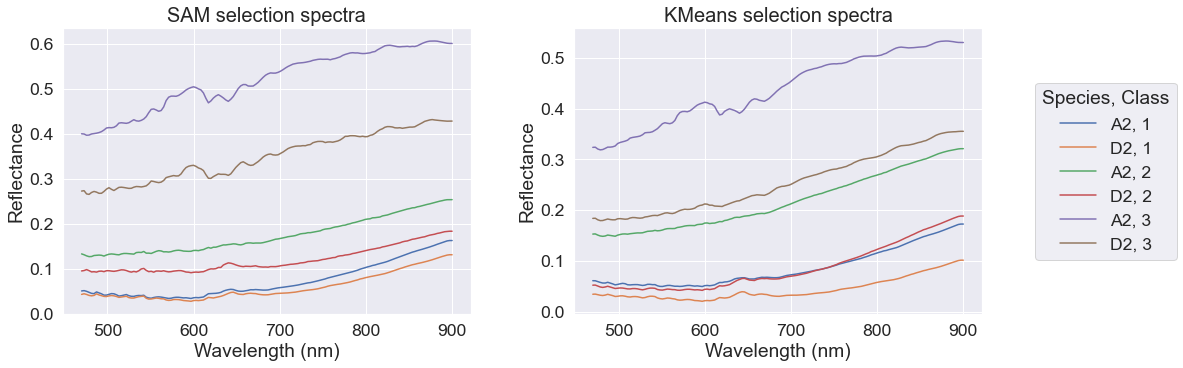

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.tight_layout(pad = 3.0) 

ax[0].plot(wl, SAM_data.values.T)

ax[0].set_title('SAM selection spectra', fontsize = '20')
ax[0].set_ylabel('Reflectance')
ax[0].set_xlabel('Wavelength (nm)')

ax[1].plot(wl, kmeans_data.values.T)

ax[1].set_title('KMeans selection spectra', fontsize = '20')
ax[1].set_ylabel('Reflectance')
ax[1].set_xlabel('Wavelength (nm)')

legend_handles = SAM_data.reset_index()[['Species', 'Class']].astype(str).apply(', '.join, axis=1).tolist()
plt.legend(legend_handles, title = 'Species, Class', loc = 'center right', bbox_to_anchor = (1.5, 0.5))

plt.savefig('Selection_spectra.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Run Savitzky-Golay smoothing and get second derivatives

In [47]:
width = 5 # 5 Width of selection window
poly = 2 # 2 Order of polynomial

In [48]:
kmeans_data.head()

470.000000  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.061338   
      D2      1         40  f11       2              1                   0.034746   
2     A2      1         40  f11       1              1                   0.153077   
      D2      1         40  f11       2              1                   0.052583   
3     A2      1         40  f11       1              1                   0.323643   

                                                                       472.885906  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.061254   
      D2      1         40  f11       2              1                   0.034982   
2     A2      1         40  f11       1              1                   0.153369   
      D2      1         40  f11       2              1                   0.052743   
3     A2      1         40  f11       1              1                   0.323930   

                                                                       475.771812  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.059574   
      D2      1         40  f11       2              1                   0.033824   
2     A2      1         40  f11       1              1                   0.151087   
      D2      1         40  f11       2              1                   0.050775   
3     A2      1         40  f11       1              1                   0.320425   

                                                                       478.657718  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.058025   
      D2      1         40  f11       2              1                   0.032761   
2     A2      1         40  f11       1              1                   0.149361   
      D2      1         40  f11       2              1                   0.048993   
3     A2      1         40  f11       1              1                   0.318705   

                                                                       481.543624  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.056806   
      D2      1         40  f11       2              1                   0.032229   
2     A2      1         40  f11       1              1                   0.148657   
      D2      1         40  f11       2              1                   0.048145   
3     A2      1         40  f11       1              1                   0.319375   

                                                                       484.429530  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.056754   
      D2      1         40  f11       2              1                   0.033073   
2     A2      1         40  f11       1              1                   0.149288   
      D2      1         40  f11       2              1                   0.049030   
3     A2      1         40  f11       1              1                   0.321596   

                                                                       487.315436  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
1     A2      1         40  f11       1              1                   0.058234   
      D2      1         40  f11       2              1                   0.034601   
2     A2      1         40  f11       1              1                   0.151144   
      D2      1         40  f11       2              1                

In [49]:
SAM_second_drv  = savgol_filter(SAM_data.values, 2*width-1, polyorder = poly, deriv = 2) # w/p = 4.5
SAM_second_drv_df = pd.DataFrame(SAM_second_drv, index = SAM_data.index, columns = SAM_data.columns)

In [50]:
kmeans_second_drv  = savgol_filter(kmeans_data.values, 2*width-1, polyorder = poly, deriv = 2) # w/p = 4.5
kmeans_second_drv_df = pd.DataFrame(kmeans_second_drv, index = kmeans_data.index, columns = kmeans_data.columns)

In [53]:
root_SAM_second_drv = SAM_second_drv_df[SAM_second_drv_df.index.get_level_values(0) == '3']
root_kmeans_second_drv = kmeans_second_drv_df[kmeans_second_drv_df.index.get_level_values(0) == '3']

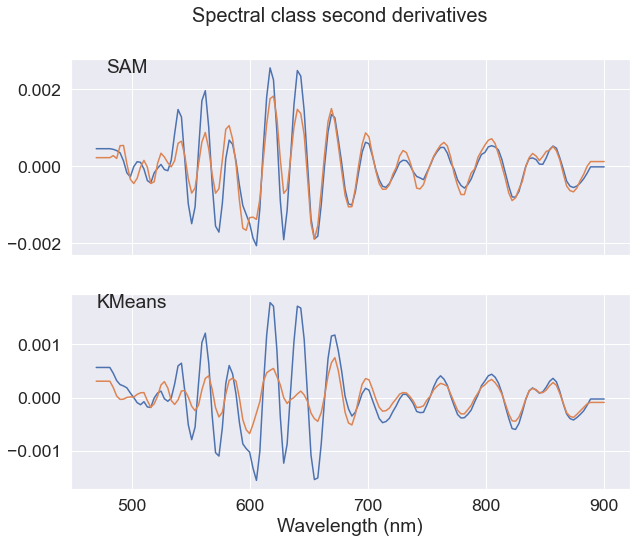

In [65]:
fig, ax = plt.subplots(2,1, figsize = (10, 8), sharex = True)
fig.tight_layout(pad = 3.0) #rect = [0.05, 0.005, 1, 0.95]
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.suptitle('Spectral class second derivatives', fontsize = '20')

ax[0].plot(wl, root_SAM_second_drv.values.T)
ax[0].set_title('SAM', y = 1.0, x = 0.1, pad = -14)
             
ax[1].plot(wl, root_kmeans_second_drv.values.T)
ax[1].set_title('KMeans', y = 1.0, x = 0.11, pad = -14)
ax[1].set(xlabel='Wavelength (nm)')    

# for ax in ax.flat:
#     ax.set_ylim(-0.001, 0.001)

plt.savefig('Root_data_second_derivatives.png', dpi=300, bbox_inches='tight')
plt.show()

### SAM informative bands

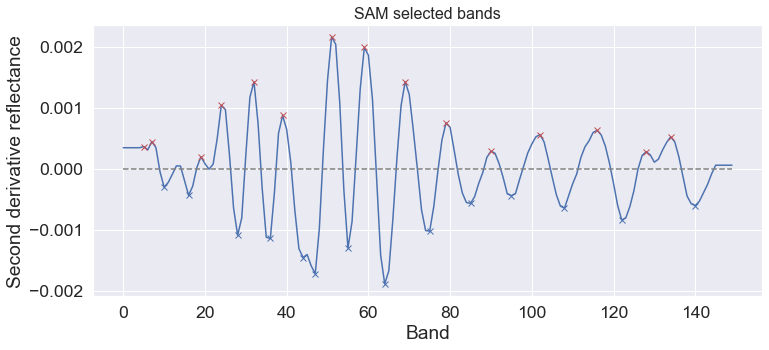

In [66]:
root_SAM_avg_data = root_SAM_second_drv.mean().values.T

fig, ax = plt.subplots(1,1, figsize = (12, 5))
peaks, _ = find_peaks(root_SAM_avg_data, height = 0.0001)
troughs, _ = find_peaks(-root_SAM_avg_data, height = 0.0001)
plt.plot(root_SAM_avg_data)
plt.plot(peaks, root_SAM_avg_data[peaks], 'x', color = 'r')
plt.plot(troughs, root_SAM_avg_data[troughs], 'x', color = 'b')
plt.plot(np.zeros_like(root_SAM_avg_data), '--', color = 'gray')
plt.title('SAM selected bands', fontsize = '16')
plt.xlabel('Band')
plt.ylabel('Second derivative reflectance')
plt.savefig('Root_SAM_selected_bands.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [56]:
selected_wl = wl[np.concatenate((peaks, troughs))]
for i in range(0, len(selected_wl)):
    for j in range(i+1, len(selected_wl)):
        if(selected_wl[i] > selected_wl[j]):
            temp = selected_wl[i];
            selected_wl[i] = selected_wl[j];
            selected_wl[j] = temp;
            
selected_wl = selected_wl.astype('int64')
selected_wl_df = pd.DataFrame(selected_wl)
selected_wl_df.to_csv('SAM_selected_wavelengths.csv', index = False)
selected_wl 

array([484, 490, 498, 516, 524, 539, 550, 562, 573, 582, 596, 605, 617,
       628, 640, 654, 669, 686, 697, 715, 729, 744, 764, 781, 804, 822,
       839, 856, 874], dtype=int64)

In [57]:
bands = np.concatenate((peaks, troughs))
for i in range(0, len(bands)):
    for j in range(i+1, len(bands)):
        if(bands[i] > bands[j]):
            temp = bands[i];
            bands[i] = bands[j];
            bands[j] = temp;
bands = bands.astype(str)
bands = np.array(['band' + s for s in bands])
bands_df = pd.DataFrame(bands)

bands_df.to_csv('SAM_selected_bands.csv', index = False)
bands

array(['band5', 'band7', 'band10', 'band16', 'band19', 'band24', 'band28',
       'band32', 'band36', 'band39', 'band44', 'band47', 'band51',
       'band55', 'band59', 'band64', 'band69', 'band75', 'band79',
       'band85', 'band90', 'band95', 'band102', 'band108', 'band116',
       'band122', 'band128', 'band134', 'band140'], dtype='<U7')

In [58]:
root_SAM_second_drv.head()

470  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000460   
      D2      1         40  f11       2              1                 0.000227   

                                                                        472.886  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000460   
      D2      1         40  f11       2              1                 0.000227   

                                                                        475.772  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000460   
      D2      1         40  f11       2              1                 0.000227   

                                                                        478.658  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000460   
      D2      1         40  f11       2              1                 0.000227   

                                                                        481.544  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000460   
      D2      1         40  f11       2              1                 0.000227   

                                                                         484.43  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000443   
      D2      1         40  f11       2              1                 0.000280   

                                                                        487.315  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000411   
      D2      1         40  f11       2              1                 0.000207   

                                                                        490.201  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000353   
      D2      1         40  f11       2              1                 0.000537   

                                                                        493.087  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                 0.000143   
      D2      1         40  f11       2              1                 0.000544   

                                                                        495.973  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                -0.000169   
      D2      1         40  f11       2              1                 0.000064   

                                                                       ...  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups  ...   
3     A2      1         40  f11       1              1                 ...   
      D2      1         40  f11       2              1                 ...   

                                                                        874.027  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups             
3     A2      1         40  f11       1              1                -0.000548   
      D2      1         40  f11       2              1                -0.000661   

                                                                        876.913  \
Class Species Rep

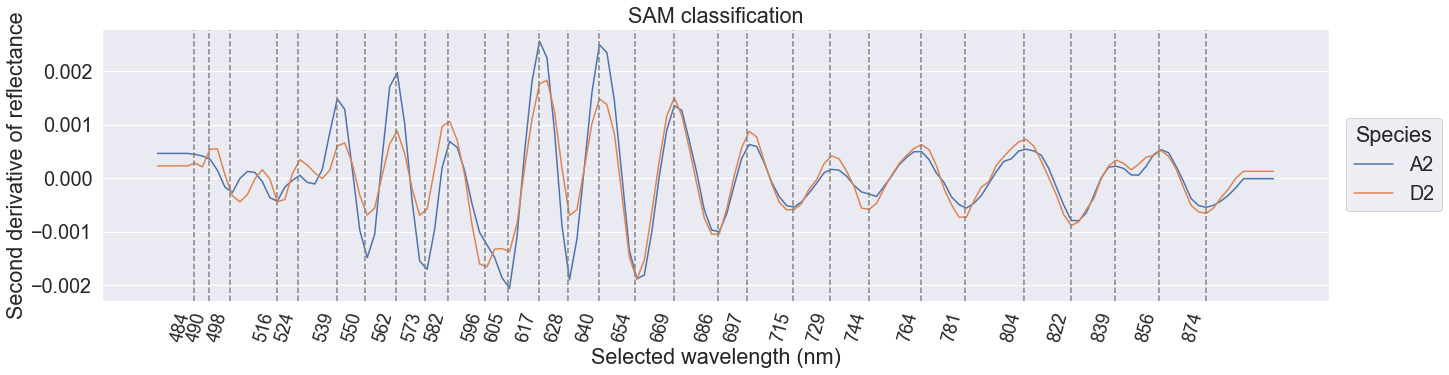

In [80]:
species_labels = root_SAM_second_drv.index.get_level_values(1).unique()

fig, ax = plt.subplots( figsize = (22,5))

sns.set(font_scale = 1.8)

plt.title('SAM classification')

plt.plot(wl, root_SAM_second_drv.values.T)
for x in selected_wl:
    plt.axvline(x, color = 'gray', ls = '--')

ax.set_xticks(selected_wl)
ax.set_xticklabels([f'{x}' for x in selected_wl], rotation=75, ha='right', fontsize=18)

plt.xlabel('Selected wavelength (nm)')
plt.ylabel('Second derivative of reflectance')

plt.legend(species_labels, title = 'Species', loc = 'center right', bbox_to_anchor = (1.1, 0.5))

plt.savefig('Selected_wavelengths_SAM_rootspectra.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### KMeans informative bands

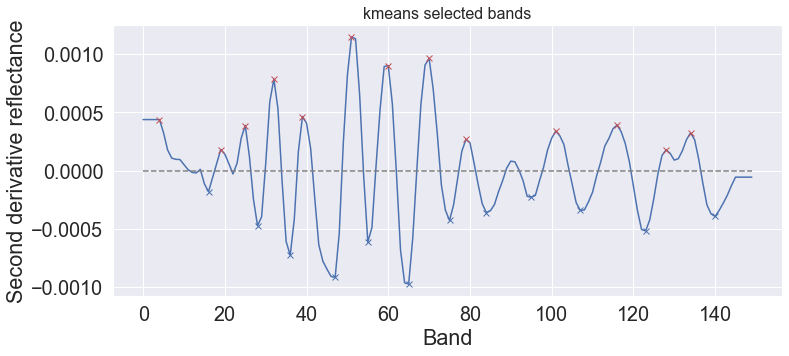

In [81]:
root_kmeans_avg_data = root_kmeans_second_drv.mean().values.T

fig, ax = plt.subplots(1,1, figsize = (12, 5))
peaks, _ = find_peaks(root_kmeans_avg_data, height = 0.0001)
troughs, _ = find_peaks(-root_kmeans_avg_data, height = 0.0001)
plt.plot(root_kmeans_avg_data)
plt.plot(peaks, root_kmeans_avg_data[peaks], 'x', color = 'r')
plt.plot(troughs, root_kmeans_avg_data[troughs], 'x', color = 'b')
plt.plot(np.zeros_like(root_kmeans_avg_data), '--', color = 'gray')
plt.title('kmeans selected bands', fontsize = '16')
plt.xlabel('Band')
plt.ylabel('Second derivative reflectance')
plt.savefig('Root_kmeans_selected_bands.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [82]:
selected_wl = wl[np.concatenate((peaks, troughs))]
for i in range(0, len(selected_wl)):
    for j in range(i+1, len(selected_wl)):
        if(selected_wl[i] > selected_wl[j]):
            temp = selected_wl[i];
            selected_wl[i] = selected_wl[j];
            selected_wl[j] = temp;
            
selected_wl = selected_wl.astype('int64')
selected_wl_df = pd.DataFrame(selected_wl)
selected_wl_df.to_csv('kmeans_selected_wavelengths.csv', index = False)
selected_wl 

array([481, 516, 524, 542, 550, 562, 573, 582, 605, 617, 628, 643, 657,
       672, 686, 697, 712, 744, 761, 778, 804, 824, 839, 856, 874],
      dtype=int64)

In [83]:
bands = np.concatenate((peaks, troughs))
for i in range(0, len(bands)):
    for j in range(i+1, len(bands)):
        if(bands[i] > bands[j]):
            temp = bands[i];
            bands[i] = bands[j];
            bands[j] = temp;
bands = bands.astype(str)
bands = np.array(['band' + s for s in bands])
bands_df = pd.DataFrame(bands)

bands_df.to_csv('kmeans_selected_bands.csv', index = False)
bands

array(['band4', 'band16', 'band19', 'band25', 'band28', 'band32',
       'band36', 'band39', 'band47', 'band51', 'band55', 'band60',
       'band65', 'band70', 'band75', 'band79', 'band84', 'band95',
       'band101', 'band107', 'band116', 'band123', 'band128', 'band134',
       'band140'], dtype='<U7')

In [84]:
root_kmeans_second_drv.head()

470.000000  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000566   
      D2      1         40  f11       2              1                   0.000309   

                                                                       472.885906  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000566   
      D2      1         40  f11       2              1                   0.000309   

                                                                       475.771812  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000566   
      D2      1         40  f11       2              1                   0.000309   

                                                                       478.657718  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000566   
      D2      1         40  f11       2              1                   0.000309   

                                                                       481.543624  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000566   
      D2      1         40  f11       2              1                   0.000309   

                                                                       484.429530  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000457   
      D2      1         40  f11       2              1                   0.000190   

                                                                       487.315436  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000321   
      D2      1         40  f11       2              1                   0.000032   

                                                                       490.201342  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000246   
      D2      1         40  f11       2              1                  -0.000031   

                                                                       493.087248  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000221   
      D2      1         40  f11       2              1                  -0.000027   

                                                                       495.973154  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                   0.000184   
      D2      1         40  f11       2              1                   0.000006   

                                                                       ...  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups  ...   
3     A2      1         40  f11       1              1                 ...   
      D2      1         40  f11       2              1                 ...   

                                                                       874.026846  \
Class Species Replicate Day Treatment Species_Groups Treatment_Groups               
3     A2      1         40  f11       1              1                  -0.000417   
      D2      1         40  f11       2              1                  -0.000368   

       

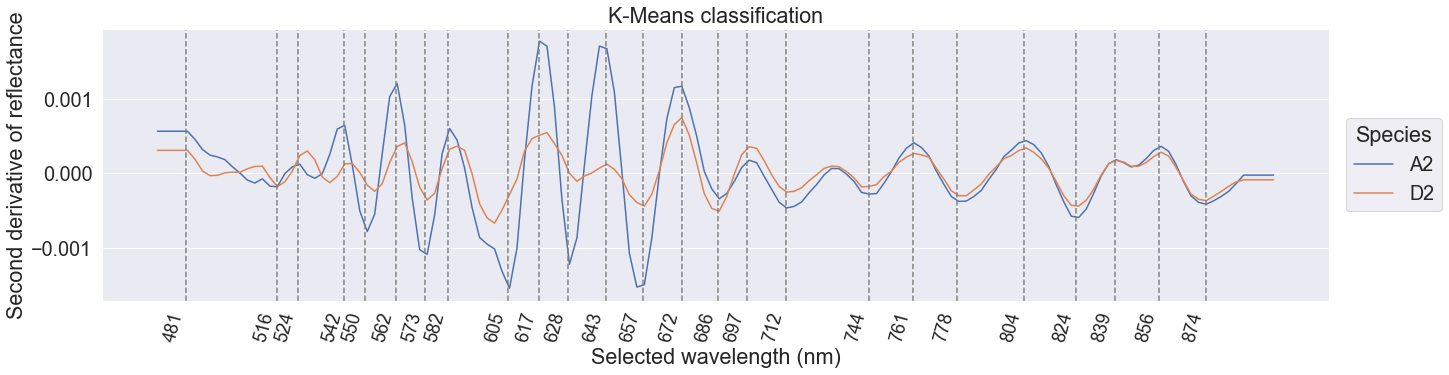

In [88]:
species_labels = root_kmeans_second_drv.index.get_level_values(1).unique()

fig, ax = plt.subplots( figsize = (22,5))
plt.title('K-Means classification')
plt.plot(wl, root_kmeans_second_drv.values.T)
for x in selected_wl:
    plt.axvline(x, color = 'gray', ls = '--')
    
ax.set_xticks(selected_wl)
ax.set_xticklabels([f'{x}' for x in selected_wl], rotation=75, ha='right', fontsize=18)

plt.xlabel('Selected wavelength (nm)')
plt.ylabel('Second derivative of reflectance')

plt.legend(species_labels, title = 'Species', loc = 'center right', bbox_to_anchor = (1.1, 0.5))

plt.savefig('Selected_wavelengths_kmans_rootspectra.png', dpi = 300, bbox_inches = 'tight')
plt.show()